In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import getpass  # To get the password without showing the input

In [2]:
# Read dataset
df = pd.read_csv("customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
# Our predictors: tenure, SeniorCitizen, MonthlyCharges
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [14]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [15]:
df.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [16]:
target = df[['Churn']]
target.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [17]:
target.Churn = target.Churn.map(dict(Yes=1, No=0))
target.head()

C:\Users\camil\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Churn
0,0
1,0
2,1
3,0
4,1


In [18]:
target.columns = target.columns.str.lower()

In [19]:
y = target['churn']

In [20]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
data = df[["tenure", "SeniorCitizen", "MonthlyCharges"]]
data.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [23]:
data.columns = data.columns.str.lower()

In [24]:
data.columns = data.columns.str.replace("seniorcitizen", "senior_citizen")
data.columns = data.columns.str.replace("monthlycharges", "monthly_charges")

In [25]:
data.head()

,tenure,senior_citizen,monthly_charges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   senior_citizen   7043 non-null   int64  
 2   monthly_charges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


In [27]:
pd.crosstab(y, data.tenure)

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
churn,,,,,,,,,,,,,,,,,,,,,
0,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
1,0,380,123,94,83,64,40,51,42,46,...,4,4,9,13,10,9,8,11,6,6


Text(0, 0.5, 'Proportion of Churn')

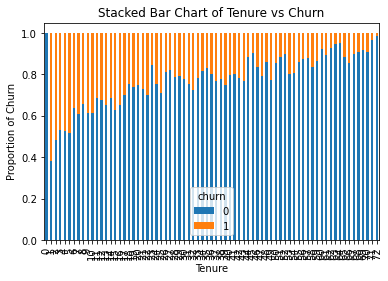

In [28]:
table=pd.crosstab(data.tenure,y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Tenure vs Churn')
plt.xlabel('Tenure')
plt.ylabel('Proportion of Churn')

Text(0, 0.5, 'Proportion of Churn')

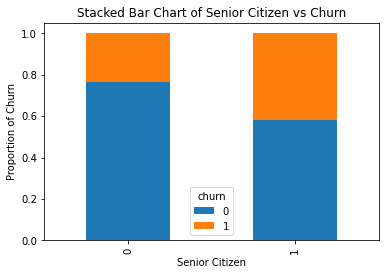

In [29]:
table2=pd.crosstab(data.senior_citizen,y)
table2.div(table2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Senior Citizen vs Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Proportion of Churn')

Text(0, 0.5, 'Proportion of Churn')

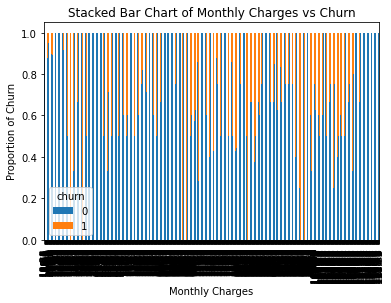

In [30]:
table3=pd.crosstab(data.monthly_charges,y)
table3.div(table3.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Monthly Charges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Proportion of Churn')
# find a way to make this bigger

C:\Users\camil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


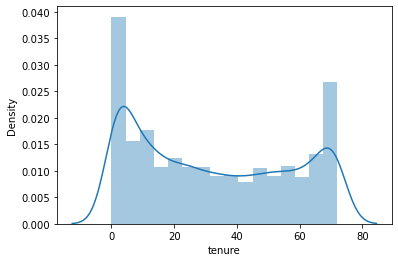

C:\Users\camil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


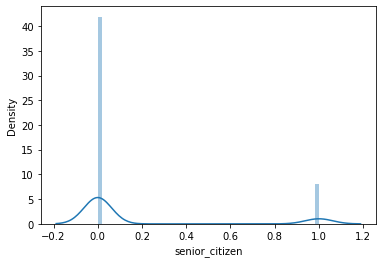

C:\Users\camil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


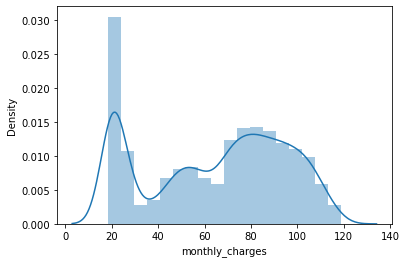

In [31]:
for column in data.columns:
    sns.distplot(data[column])
    plt.show()

In [32]:
transformer = StandardScaler().fit(data)
num_normalized = transformer.transform(data)
X = pd.DataFrame(num_normalized)
X.columns = data.columns
X.head()

,tenure,senior_citizen,monthly_charges
0,-1.277445,-0.439916,-1.160323
1,0.066327,-0.439916,-0.259629
2,-1.236724,-0.439916,-0.362660
3,0.514251,-0.439916,-0.746535
4,-1.236724,-0.439916,0.197365


In [33]:
# We separate training and testing datasets and correspondant targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [34]:
# Set and fit the model
logreg = LogisticRegression(random_state=0, multi_class='auto').fit(X_train, y_train)

In [35]:
# We predict on the testing dataset
y_pred_class = logreg.predict(X_test)

In [36]:
pd.Series(y_pred_class).value_counts()

0    1700
1     413
dtype: int64

In [37]:
y_test.value_counts()

0    1547
1     566
Name: churn, dtype: int64

In [38]:
confusion_matrix(y_test, y_pred_class)

array([[1392,  155],
       [ 308,  258]], dtype=int64)

In [39]:
confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

###### Classification Accuracy: Overall, how often is the classifier correct?

In [40]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7808802650260294
0.7808802650260294


###### Sensitivity: When the actual value is positive, how often is the prediction correct?

In [41]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.4558303886925795
0.4558303886925795


###### False Negative Rate: When the actual value is positive, how often is the prediction incorrect?

In [42]:
false_negative_rate = FN / float( FN + TP)

print(false_negative_rate)
print(1 - sensitivity)

0.5441696113074205
0.5441696113074205


###### Specificity: When the actual value is negative, how often is the prediction correct?

In [43]:
specificity = TN / (TN + FP)

print(specificity)

0.8998060762766645


###### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [44]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.10019392372333549
0.10019392372333547


<AxesSubplot:>

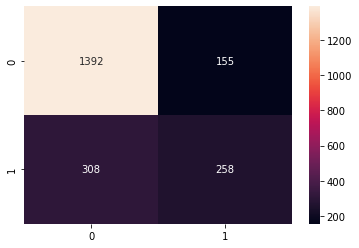

In [45]:
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True,fmt='g')

In [39]:
# Accuracy
print(logreg.score(X_test, y_test))
print(classification_report(y_test, y_pred_class))

0.7808802650260294
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1547
           1       0.62      0.46      0.53       566

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



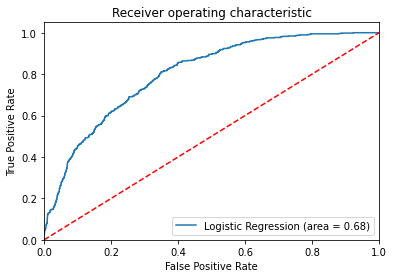

In [40]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Reducing Imbalance with SMOTE

In [63]:
X_smote = data
y_smote = y

os = SMOTE(random_state=0)
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
columns = X_smote_train.columns

os_data_X,os_data_y=os.fit_sample(X_smote_train, y_smote_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['churn'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of No in oversampled data",len(os_data_y[os_data_y['churn']==0]))
print("Number of Yes",len(os_data_y[os_data_y['churn']==1]))
print("Proportion of No in oversampled data is ",len(os_data_y[os_data_y['churn']==0])/len(os_data_X))
print("Proportion of Yes data in oversampled data is ",len(os_data_y[os_data_y['churn']==1])/len(os_data_X))

length of oversampled data is  8266
Number of No in oversampled data 4133
Number of Yes 4133
Proportion of No in oversampled data is  0.5
Proportion of Yes data in oversampled data is  0.5


In [76]:
ys = os_data_y['churn']
ys

0       0
1       0
2       0
3       1
4       1
       ..
8261    1
8262    1
8263    1
8264    1
8265    1
Name: churn, Length: 8266, dtype: int64

In [77]:
# Running the model with the SMOTEd data
Xs_train, Xs_test, ys_train, ys_test = train_test_split(os_data_X, ys, test_size=0.3, random_state=100)
logreg_s = LogisticRegression(random_state=0, multi_class='auto').fit(Xs_train, ys_train)
ys_pred_class = logreg_s.predict(Xs_test)

In [78]:
pd.Series(ys_pred_class).value_counts()

1    1273
0    1207
dtype: int64

In [79]:
ys.value_counts()

0    4133
1    4133
Name: churn, dtype: int64

In [80]:
confusion_matrix(ys_test, ys_pred_class)

array([[881, 354],
       [326, 919]], dtype=int64)

In [81]:
confusion_s = confusion_matrix(ys_test, ys_pred_class)
TP = confusion_s[1, 1]
TN = confusion_s[0, 0]
FP = confusion_s[0, 1]
FN = confusion_s[1, 0]
print("Accuracy is: ", (TP + TN) / float(TP + TN + FP + FN))

sensitivity_s = TP / float(FN + TP)
print("Sensitivity is: ", sensitivity_s)
false_negative_rate_s = FN / float( FN + TP)
print("FN rate: ", false_negative_rate_s)

specificity_s = TN / (TN + FP)
print("Specificity is: ", specificity_s)
false_positive_rate_s = FP / float(TN + FP)
print("FP rate is: ", false_positive_rate_s)

Accuracy is:  0.7258064516129032
Sensitivity is:  0.738152610441767
FN rate:  0.26184738955823295
Specificity is:  0.7133603238866397
FP rate is:  0.28663967611336033


<AxesSubplot:>

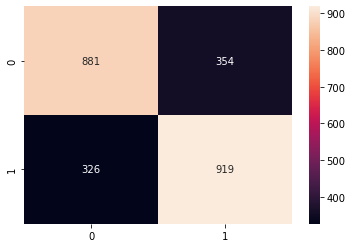

In [82]:
cm_s = confusion_matrix(ys_test, ys_pred_class)
sns.heatmap(cm_s, annot=True,fmt='g')

In [85]:
# Accuracy
print(logreg_s.score(Xs_test, ys_test))
print(classification_report(ys_test, ys_pred_class))

0.7258064516129032
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1235
           1       0.72      0.74      0.73      1245

    accuracy                           0.73      2480
   macro avg       0.73      0.73      0.73      2480
weighted avg       0.73      0.73      0.73      2480



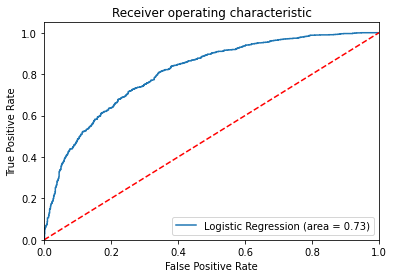

In [86]:
logit_roc_auc_s = roc_auc_score(ys_test, logreg_s.predict(Xs_test))
fpr_s, tpr_s, thresholds_s = roc_curve(ys_test, logreg_s.predict_proba(Xs_test)[:,1])
plt.figure()
plt.plot(fpr_s, tpr_s, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_s)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

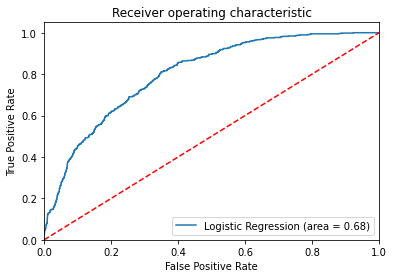

In [87]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusion:
It's a better model after applying the SMOTE, albeit not by a lot.

### UnderSampling using TomeLinks

In [88]:
tl = TomekLinks("majority")
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

C:\Users\camil\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


0    4697
1    1869
Name: churn, dtype: int64

In [89]:
# Running the model with the Tomek-ed data
X_tl_train, X_tl_test, y_tl_train, y_tl_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)
logreg_t = LogisticRegression(random_state=0, multi_class='auto').fit(X_tl_train, y_tl_train)
y_tl_pred_class = logreg_t.predict(X_tl_test)

In [56]:
pd.Series(y_tl_pred_class).value_counts()

0    1614
1     356
dtype: int64

In [57]:
y_tl.value_counts()

0    4697
1    1869
Name: churn, dtype: int64

In [58]:
confusion_matrix(y_tl_test, y_tl_pred_class)

array([[1311,   86],
       [ 303,  270]], dtype=int64)

In [59]:
confusion_tl = confusion_matrix(y_tl_test, y_tl_pred_class)
TP = confusion_tl[1, 1]
TN = confusion_tl[0, 0]
FP = confusion_tl[0, 1]
FN = confusion_tl[1, 0]
print("Accuracy is: ", (TP + TN) / float(TP + TN + FP + FN))

sensitivity_tl = TP / float(FN + TP)
print("Sensitivity is: ", sensitivity_tl)
false_negative_rate_tl = FN / float( FN + TP)
print("FN rate: ", false_negative_rate_tl)

specificity_tl = TN / (TN + FP)
print("Specificity is: ", specificity_tl)
false_positive_rate_tl = FP / float(TN + FP)
print("FP rate is: ", false_positive_rate_tl)

Accuracy is:  0.8025380710659898
Sensitivity is:  0.4712041884816754
FN rate:  0.5287958115183246
Specificity is:  0.9384395132426628
FP rate is:  0.06156048675733715


<AxesSubplot:>

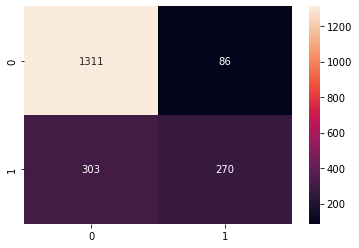

In [60]:
cm_tl = confusion_matrix(y_tl_test, y_tl_pred_class)
sns.heatmap(cm_tl, annot=True,fmt='g')

In [90]:
# Accuracy
print(logreg_t.score(X_tl_test, y_tl_test))
print(classification_report(y_tl_test, y_tl_pred_class))

0.8040609137055837
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1397
           1       0.73      0.52      0.61       573

    accuracy                           0.80      1970
   macro avg       0.78      0.72      0.74      1970
weighted avg       0.80      0.80      0.79      1970



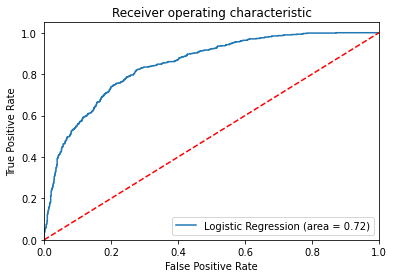

In [91]:
logit_roc_auc_tl = roc_auc_score(y_tl_test, logreg_t.predict(X_tl_test))
fpr_tl, tpr_tl, thresholds_tl = roc_curve(y_tl_test, logreg_t.predict_proba(X_tl_test)[:,1])
plt.figure()
plt.plot(fpr_tl, tpr_tl, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_tl)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusion
The model to which we applied SMOTE only seems to be better at predicting the target than the one to which we applied the TomekLinks model by very little (0,01).\
It's also with the SMOTE method that the recall metric for the 1 class is the highest, 0.75.
Could we combine the SMOTE and the TomekLinks methods?